In [227]:
import perceval as pcvl
import perceval.components.unitary_components as comp
import math

In [228]:
bs = pcvl.BasicState("|0,1>")
print(f"Number of photons: {bs.n}")
print(f"Number of modes: {bs.m}")
print(f"Photons in mode 0: {bs[0]}")
print(f"Photons in mode 1: {bs[1]}")

Number of photons: 1
Number of modes: 2
Photons in mode 0: 0
Photons in mode 1: 1


In [229]:
state = pcvl.BasicState([0, 1]) * pcvl.BasicState([2, 3])
print(state)

|0,1,2,3>


In [230]:
st1 = pcvl.StateVector("|1,0>")
st2 = pcvl.StateVector("|0,1>")
st3 = st1 + st2
print(st3)
print(f"First state: {st3[0]}")
print(f"Second state: {st3[1]}")

sqrt(2)/2*|1,0>+sqrt(2)/2*|0,1>
First state: |0,1>
Second state: |1,0>


In [231]:
# sv = pcvl.StateVector("|0,1,1>") + pcvl.StateVector("|1,1,0>")
# map_measure_sv = sv.measure()
# for s, (p, sv) in map_measure_sv.items():
# print(s, p, sv)

In [232]:
alpha = pcvl.P("alpha")
alpha2 = pcvl.P("phi", min_v=0, max_v=2 * math.pi, periodic=True)

In [233]:
c1 = pcvl.BS(theta=alpha)

In [234]:
c2 = pcvl.BS(theta=alpha) // pcvl.PS(pcvl.P("phi")) // pcvl.BS(theta=alpha)

In [235]:
alpha.set_value(math.pi / 2)
alpha.defined

True

In [236]:
pcvl.pdisplay(c1.compute_unitary(use_symbolic=False))

<IPython.core.display.Math object>

In [237]:
phi1 = pcvl.P("phi1")
phi2 = pcvl.P("phi2")
phi1.set_value(0)
phi2.set_value(0)

In [238]:
mzi = (
    pcvl.Circuit(m=2, name="mzi")
    .add((0, 1), comp.BS(math.pi))
    .add(0, comp.PS(-math.pi / 2))
    .add(1, comp.PS(-math.pi / 2))
)

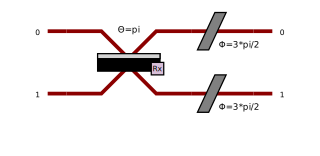

In [239]:
pcvl.pdisplay(mzi)

In [240]:
pcvl.pdisplay(mzi.compute_unitary(use_symbolic=False))

<IPython.core.display.Math object>

In [241]:
from perceval.utils import Encoding

In [242]:
phi1 = pcvl.P("phi1")
theta = pcvl.P("theta")
theta2 = pcvl.P("theta2")
theta3 = pcvl.P("theta3")

In [243]:
phi1.set_value(math.pi)
theta.set_value(54.74 / (180 * math.pi))
theta2.set_value(-54.74 / (180 * math.pi))
theta3.set_value(17.63 / (180 * math.pi))

In [244]:
mzi = pcvl.Circuit(m=4, name="mzi")
mzi.add(1, comp.PS(phi1)).add(3, comp.PS(phi1)).add(0, comp.PERM([0, 2, 1, 3])).add(
    (0, 1), comp.BS(theta)
).add((2, 3), comp.BS(theta)).add(0, comp.PERM([0, 2, 1, 3])).add(
    (0, 1), comp.BS(theta2)
).add(
    (2, 3), comp.BS(theta3)
)

In [248]:
local_proc = pcvl.Processor("SLOS", 4)
local_proc.set_circuit(mzi)
local_proc.set_postselection(pcvl.PostSelect("[4,5]==1"))

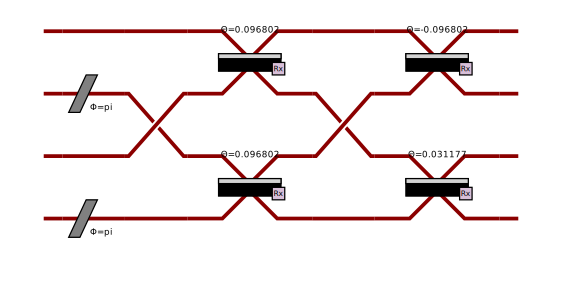

In [249]:
pcvl.pdisplay(local_proc)

In [252]:
c1 = local_proc.linear_circuit()
pcvl.pdisplay(c1.compute_unitary(use_symbolic=False).transpose()*1/3)

<IPython.core.display.Math object>